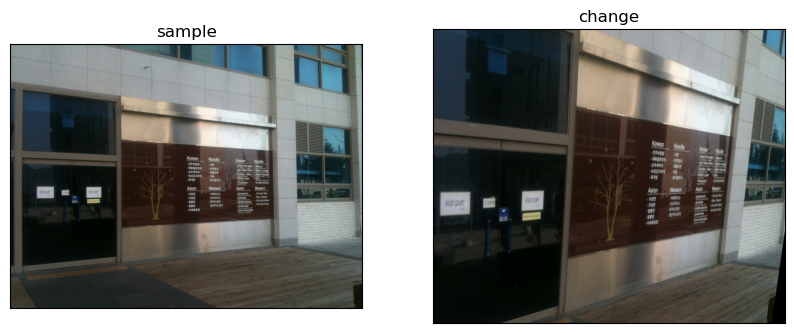

In [16]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dsu1.jpg',cv2.IMREAD_COLOR)
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst=img)
rows,cols,ch = img.shape
pts1 = np.float32([[110,230],[675,170],[115,480],[720,520]])
pts2 = np.float32([[100,100],[960,110],[100,700],[940,700]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(1200,1000))

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('sample')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('change')
plt.xticks([]), plt.yticks([])
plt.show()